### This is my rough draft of the project. Please let me know if I am on the right track.  This project is challenging for me

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('movies.csv', index_col='id')


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Checking to see any columns missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (I will delete unnecessary columns and check data type)

In [4]:
# After checking the data, I see I dont need columns : imdb_id, cast, homepage, director, tagline, keywords, overview, production_companies, budget,revenue,genres
# I drop those columns because I dont need them to find the answers for my questions.
# My first question: How much money do producers spend on average by years? so I need release_year, budget_adj, and revenue_adj
# My second question: What month do movies release the most? so I need release_date to collect the month

df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies','budget','revenue','genres'], axis=1, inplace=True)
df.head(1)

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 848.9+ KB


In [6]:
# the release_date format is string, I need to convert it to datetime
df['release_date']=pd.to_datetime(df['release_date'])

In [7]:
df.head()

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#check to see if any missing data in budget_adj and revenue_adj
print (df['budget_adj'].isnull().sum())
print (df['revenue_adj'].isnull().sum())

0
0


In [9]:
#check to see if any duplicate.  If we have any duplicate, we drop it
sum(df.duplicated())

1

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 9 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 848.8+ KB


In [12]:
#check to see how many data that budget_adj is not 0
df[df.budget_adj != 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 135397 to 22293
Data columns (total 9 columns):
popularity        5169 non-null float64
original_title    5169 non-null object
runtime           5169 non-null int64
release_date      5169 non-null datetime64[ns]
vote_count        5169 non-null int64
vote_average      5169 non-null float64
release_year      5169 non-null int64
budget_adj        5169 non-null float64
revenue_adj       5169 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 403.8+ KB


In [13]:
#check to see how many data that revenue_adj is not 0
df[df.revenue_adj != 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 135397 to 2161
Data columns (total 9 columns):
popularity        4849 non-null float64
original_title    4849 non-null object
runtime           4849 non-null int64
release_date      4849 non-null datetime64[ns]
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 378.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How much money do producers spend on average by years?)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d7a6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119028668>]], dtype=object)

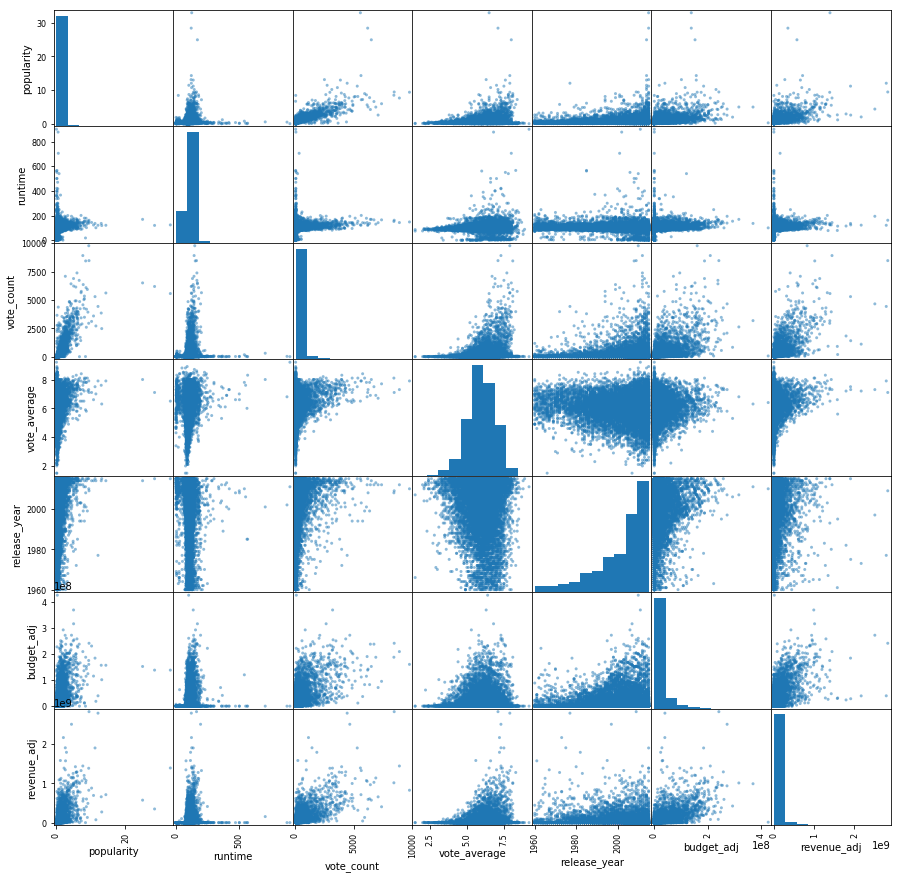

In [14]:
# I plot the whole thing to have overview of all data and to see if there is any relationship between data
pd.plotting.scatter_matrix(df,figsize=(15,15))

In [15]:
# to answer question 1, we just need release_year, budget_adj, and revenue_adj columns
df_year = df.loc[:,'release_year':'revenue_adj']
df_year.head()

,release_year,budget_adj,revenue_adj
id,,,
135397,2015,1.379999e+08,1.392446e+09
76341,2015,1.379999e+08,3.481613e+08
262500,2015,1.012000e+08,2.716190e+08
140607,2015,1.839999e+08,1.902723e+09
168259,2015,1.747999e+08,1.385749e+09


In [16]:
# select data that is not equal 0.  I believe removing data with 0 is a better way than replacing 0 with mean. 
# we have 10865 rows; However, we have only 5169 rows with nonzero data for budget_adj, and 4849 rows with nonzero data for revenue_adj
# It's about half of the full data. We should not replace zero with the mean, so I rather use nonzero data and drop zero data.
df_budget_adj = df_year[df_year.budget_adj != 0]
df_revenue_adj = df_year[df_year.revenue_adj != 0]

# drop unnecessary columns
df_budget_adj.drop(['revenue_adj'],axis =1,inplace = True)
df_revenue_adj.drop(['budget_adj'],axis =1,inplace = True)


/Users/bendk/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/bendk/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df_budget_adj.head()

,release_year,budget_adj
id,,
135397,2015,1.379999e+08
76341,2015,1.379999e+08
262500,2015,1.012000e+08
140607,2015,1.839999e+08
168259,2015,1.747999e+08


In [18]:
df_revenue_adj.head()

,release_year,revenue_adj
id,,
135397,2015,1.392446e+09
76341,2015,3.481613e+08
262500,2015,2.716190e+08
140607,2015,1.902723e+09
168259,2015,1.385749e+09


In [19]:
df_budget_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 135397 to 22293
Data columns (total 2 columns):
release_year    5169 non-null int64
budget_adj      5169 non-null float64
dtypes: float64(1), int64(1)
memory usage: 121.1 KB


In [20]:
df_revenue_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 135397 to 2161
Data columns (total 2 columns):
release_year    4849 non-null int64
revenue_adj     4849 non-null float64
dtypes: float64(1), int64(1)
memory usage: 113.6 KB


In [21]:
# find the mean for each year
df_budget_adj_mean = df_budget_adj.groupby(['release_year']).mean()
df_revenue_adj_mean = df_revenue_adj.groupby(['release_year']).mean()

In [22]:
df_budget_adj_mean.head()

,budget_adj
release_year,
1960,1.806946e+07
1961,2.588946e+07
1962,2.817583e+07
1963,4.746668e+07
1964,2.523429e+07


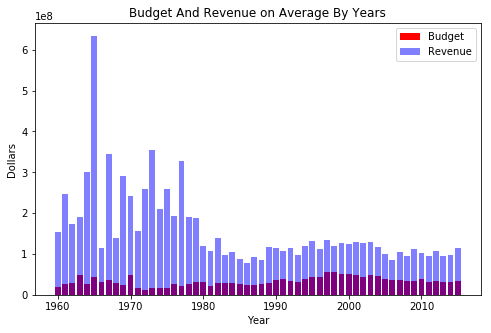

In [23]:
#plot data
plt.subplots(figsize=(8,5))
plt.bar(df_budget_adj_mean.index,df_budget_adj_mean['budget_adj'],width=0.8, color='r',alpha = 1,label = 'Budget')
plt.bar(df_revenue_adj_mean.index,df_revenue_adj_mean['revenue_adj'],width=0.8, color='b',alpha = 0.5,label = 'Revenue')
plt.title('Budget And Revenue on Average By Years')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend();

### Research Question 2  (What month do movies release the most?)

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# I get the month of the release day, then plot them to see in what month we have 
df['month'] = df['release_date'].dt.month
df.head()

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
id,,,,,,,,,,
135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
262500,13.112507,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3
140607,11.173104,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
168259,9.335014,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4


In [25]:
df_month = df.groupby(['month']).count()
df_month

,popularity,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
month,,,,,,,,,
1,919,919,919,919,919,919,919,919,919
2,691,691,691,691,691,691,691,691,691
3,822,822,822,822,822,822,822,822,822
4,797,797,797,797,797,797,797,797,797
5,809,809,809,809,809,809,809,809,809
6,827,827,827,827,827,827,827,827,827
7,799,799,799,799,799,799,799,799,799
8,918,918,918,918,918,918,918,918,918
9,1331,1331,1331,1331,1331,1331,1331,1331,1331


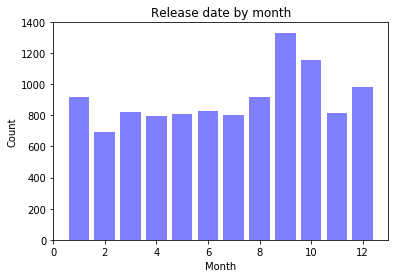

In [26]:
# plot data
plt.bar(df_month.index,df_month['revenue_adj'],width=0.8, color='b',alpha = 0.5)
plt.title('Release date by month')
plt.xlabel('Month')
plt.ylabel('Count');

<a id='conclusions'></a>
## Conclusions

> **Question 1: How much money do producers spend on average by years?**: Looking the first graph, I see that the amount of money is used to produce movies is stable over years (looking the red columns).  I see the revenue gets more stable after 1980.  It was fluctuated before 1980, it means producers could make a lot of money before 1980. 

> **Question 2: What month do movies release the most?**: As we can see, September is the month that new movies come out the most.  We can expect to see more new movies on September and October.

The limitation is more than half of budget_adj and revenue_adj are zero, so I had to drop all zero data.  It causes I made my conclusion based on smaller amount of data.  It makes my conclusion less accurate.  Moreover, the adjusted data is given.  I'm not sure how it's calculated.  It could be another reason that make my conclusion less accurate.